### Actividad: Práctica didáctica SVM

Realiza las siguientes actividades en equipo (Mismo equipo que en reto).

1. Escala los datos usando StandardScaler.
2. Entrena un clasificador LinearSVC con los datos escalados.
3. Entrena un clasificador SVC con kernel RBF (gamma=0.5, C=1).
4. Evalúa ambos modelos con accuracy_score en el conjunto de prueba.
5. Después responde las dos preguntas que aparecen debajo.

Grafica las fronteras de decisión de ambos modelos para visualizar las diferencias.

Accuracy LinearSVC: 0.8333333333333334
Accuracy SVC (RBF): 0.9833333333333333


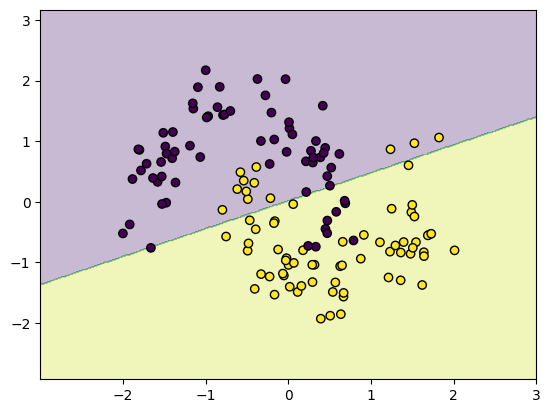

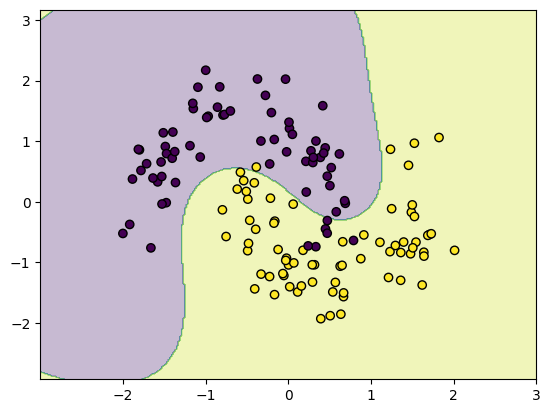

In [1]:
# =========================================
# Actividad: Clasificación con SVM en make_moons
# =========================================

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import accuracy_score

# Generar dataset
X, y = make_moons(n_samples=200, noise=0.2, random_state=42)

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# =========================================
# TODO: Escalar los datos con StandardScaler
# =========================================
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# =========================================
# TODO: Entrenar un modelo LinearSVC
# =========================================
linear_svm = LinearSVC(random_state=42)
linear_svm.fit(X_train_scaled, y_train)


# =========================================
# TODO: Entrenar un modelo SVC con kernel RBF
# =========================================
rbf_svm = SVC(kernel='rbf', gamma=0.5, C=1, random_state=42)
rbf_svm.fit(X_train_scaled, y_train)


# =========================================
# TODO: Evaluar los modelos con accuracy_score
# Imprimir los resultados
# =========================================
y_pred_linear = linear_svm.predict(X_test_scaled)
accuracy_linear = accuracy_score(y_test, y_pred_linear)
print(f"Accuracy LinearSVC: {accuracy_linear}")

y_pred_rbf = rbf_svm.predict(X_test_scaled)
accuracy_rbf = accuracy_score(y_test, y_pred_rbf)
print(f"Accuracy SVC (RBF): {accuracy_rbf}")


# (Opcional) Graficar frontera de decisión
def plot_decision_boundary(model, X, y):
    h = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k')
    plt.show()

# TODO: Usar plot_decision_boundary(linear_svm, X_train_scaled, y_train)
# y luego con el modelo RBF
plot_decision_boundary(linear_svm, X_train_scaled, y_train)
plot_decision_boundary(rbf_svm, X_train_scaled, y_train)

Responde:

1. ¿Cuál modelo tuvo mayor exactitud?
2. ¿Por qué creen que ocurrió esto?


1.- El modelo SVC.
2.- El modelo SVC es capaz de encontrar fronteras de decisión no lineales, lo que le permite ajustarse mejor a la forma de los datos y lograr una mayor exactitud.